In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score

In [2]:
df = pd.read_csv('current_FAO/raw_files/Trade_Crops_Livestock_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1')
print(df.shape)
df

(14566119, 11)


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14566114,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2009,2009,1000 US$,26569.0,A
14566115,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2010,2010,1000 US$,27129.0,A
14566116,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2011,2011,1000 US$,27395.0,A
14566117,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2012,2012,1000 US$,42666.0,A


In [3]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14566119 entries, 0 to 14566118
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Area Code     int64  
 1   Area          object 
 2   Item Code     int64  
 3   Item          object 
 4   Element Code  int64  
 5   Element       object 
 6   Year Code     int64  
 7   Year          int64  
 8   Unit          object 
 9   Value         float64
 10  Flag          object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.2+ GB


In [4]:
df.drop(columns = ['Area Code', 'Item Code', 'Element Code', 'Year Code', 'Flag','Unit'], axis = 1, inplace = True)
df=df.loc[df['Element']=='Export Quantity']
df.rename(columns = {'Value':'Export Quantity(tonnes)'}, inplace = True)
df.drop(columns = ['Element'], axis = 1, inplace = True)
df

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Area,Item,Year,Export Quantity(tonnes)
0,Afghanistan,Almonds shelled,1961,0.0
1,Afghanistan,Almonds shelled,1962,0.0
2,Afghanistan,Almonds shelled,1963,0.0
3,Afghanistan,Almonds shelled,1964,0.0
4,Afghanistan,Almonds shelled,1965,0.0
...,...,...,...,...
14566061,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2009,17390.0
14566062,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2010,12748.0
14566063,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2011,11322.0
14566064,Net Food Importing Developing Countries,Wine+Vermouth+Sim.,2012,19879.0


In [5]:
print(df['Area'].unique())
print(df.shape)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'China, mainland' 'China, Taiwan Province of'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethiopia PDR'
 'Falkland Islands (Ma

In [6]:
drop_countries = ['USSR','European Union (exc intra-trade)', 'World', 'Saint Kitts and Nevis',
                  'Saint Lucia', 'Saint Pierre and Miquelon', 'Netherlands Antilles (former)',
                  'Saint Vincent and the Grenadines', 'Sudan (former)', 
                  'The former Yugoslav Republic of Macedonia', 'Serbia and Montenegro',
                  'Sao Tome and Principe', 'Seychelles', 'Central Asia',
                  'Belgium-Luxembourg', 'Netherlands Antilles (former)', 'EU(12)ex.int', 'EU(15)ex.int',
                  'EU(25)ex.int', 'EU(27)ex.int', 'European Union (exc intra-trade)', 'World',
                  'Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
                  'Southern Africa', 'Western Africa', 'Americas', 'Northern America',
                  'Central America', 'Caribbean', 'South America', 'Asia', 'Central Asira',
                  'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                  'Europe', 'Eastern Europe', 'Northern Europe', 'Southern Europe',
                  'Western Europe', 'Oceania', 'Australia & New Zealand', 'Melanesia',
                  'Micronesia', 'Polynesia', 'European Union', 'Least Developed Countries',
                  'Land Locked Developing Countries', 'Small Island Developing States',
                  'Low Income Food Deficit Countries','Net Food Importing Developing Countries','China, Hong Kong SAR','China, Macao SAR','China, mainland', 'China, Taiwan Province of'
 'Colombia' ]
for x in drop_countries:
    df.drop(df[df['Area'] == x].index, axis = 0, inplace = True)
print(df.shape)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2327426, 4)


In [7]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [Area, Item, Year, Export Quantity(tonnes)]
Index: []


In [8]:
df_grouped_summed = df.groupby(['Item','Area']).sum()
df_grouped_summed.drop(columns=['Year'],inplace=True,axis=1)
g = df_grouped_summed['Export Quantity(tonnes)'].groupby(level=0, group_keys=False)
df_top = g.nlargest(10)
print(df_top)

Item                          Area                      
Alfalfa meal and pellets      France                        12690105.0
                              Canada                        10146013.0
                              United States of America       8117293.0
                              Spain                          4294983.0
                              Italy                          2614286.0
                                                               ...    
Yoghurt, concentrated or not  Iran (Islamic Republic of)      685814.0
                              Czechia                         497278.0
                              Finland                         416833.0
                              Poland                          388560.0
                              Greece                          349249.0
Name: Export Quantity(tonnes), Length: 4187, dtype: float64


In [9]:
print(df_top.to_string())

Item                                          Area                                 
Alfalfa meal and pellets                      France                                   1.269010e+07
                                              Canada                                   1.014601e+07
                                              United States of America                 8.117293e+06
                                              Spain                                    4.294983e+06
                                              Italy                                    2.614286e+06
                                              Australia                                2.523810e+06
                                              Denmark                                  2.425599e+06
                                              Netherlands                              1.377229e+06
                                              Belgium                                  5.489530e+05
                

In [10]:
'''
for x in df_top.index:
    #print(x)
    df_item = df.drop(df[df['Item'] != x[0] ].index, axis = 0)
    print(df_item)
'''

"\nfor x in df_top.index:\n    #print(x)\n    df_item = df.drop(df[df['Item'] != x[0] ].index, axis = 0)\n    print(df_item)\n"

In [11]:
print(df.Item.unique())

['Almonds shelled' 'Anise, badian, fennel, coriander' 'Apples' 'Apricots'
 'Apricots, dry' 'Cake, cottonseed' 'Cotton lint' 'Cottonseed'
 'Crude materials' 'Figs' 'Figs dried' 'Forage products'
 'Fruit, dried nes' 'Fruit, fresh nes' 'Fruit, prepared nes' 'Grapes'
 'Hair, fine' 'Hides, cattle, wet salted' 'Honey, natural' 'Linseed'
 'Maize' 'Melons, other (inc.cantaloupes)' 'Mushrooms and truffles'
 'Nuts, nes' 'Oilseeds nes' 'Olives' 'Onions, shallots, green' 'Oranges'
 'Pears' 'Pepper (piper spp.)' 'Pistachios' 'Plums and sloes'
 'Plums dried (prunes)' 'Potatoes' 'Raisins' 'Sesame seed' 'Silk raw'
 'Skins, sheep, dry salted' 'Spices, nes' 'Tobacco products nes'
 'Tomatoes' 'Vegetables, dehydrated' 'Vegetables, fresh nes'
 'Vegetables, fresh or dried products nes' 'Vegetables, frozen'
 'Walnuts, shelled' 'Walnuts, with shell' 'Watermelons' 'Wool, degreased'
 'Wool, greasy' 'Yoghurt, concentrated or not' 'Cereals'
 'Fodder & Feeding stuff' 'Milk Equivalent' 'Oilseed Cake Meal'
 'Oilseed

In [12]:
df_top.to_frame()
x=input("Enter the item: ")
def get_countries(x):
    result = list(df_top.get(key = x).index)
    return result
countries=get_countries(x)
#print(countries)
def get_data(x,countries):
    df_train = pd.DataFrame()
    for country in countries:
        df1 = df.loc[(df['Item'] == x) & (df['Area']==country)]
        df_train=df_train.append(df1,ignore_index=True) 
    return df_train
df_train = get_data(x,countries)
df_train

Enter the item: Spices, nes


,Area,Item,Year,Export Quantity(tonnes)
0,India,"Spices, nes",1961,18045.0
1,India,"Spices, nes",1962,18616.0
2,India,"Spices, nes",1963,18232.0
3,India,"Spices, nes",1964,17232.0
4,India,"Spices, nes",1965,20518.0
...,...,...,...,...
525,Germany,"Spices, nes",2009,8685.0
526,Germany,"Spices, nes",2010,8698.0
527,Germany,"Spices, nes",2011,9824.0
528,Germany,"Spices, nes",2012,9977.0


In [13]:
df_train.drop(columns = ['Item'], axis = 1, inplace = True)
df_train

,Area,Year,Export Quantity(tonnes)
0,India,1961,18045.0
1,India,1962,18616.0
2,India,1963,18232.0
3,India,1964,17232.0
4,India,1965,20518.0
...,...,...,...
525,Germany,2009,8685.0
526,Germany,2010,8698.0
527,Germany,2011,9824.0
528,Germany,2012,9977.0


In [14]:
data_final = df_train.pivot(index='Area', columns='Year', values='Export Quantity(tonnes)')
data_final=data_final.transpose().reset_index()
data_final=data_final.fillna(0)
data_final

Area,Year,China,France,Germany,India,Netherlands,Pakistan,Singapore,Turkey,United Arab Emirates,United States of America
0,1961,2010.0,422.0,329.0,18045.0,30.0,545.0,2700.0,884.0,0.0,0.0
1,1962,2314.0,335.0,309.0,18616.0,35.0,243.0,2747.0,1368.0,0.0,0.0
2,1963,2502.0,352.0,295.0,18232.0,42.0,183.0,3415.0,1052.0,0.0,0.0
3,1964,2685.0,380.0,298.0,17232.0,49.0,1550.0,2573.0,1570.0,0.0,1385.0
4,1965,3064.0,425.0,367.0,20518.0,78.0,2441.0,3738.0,1425.0,0.0,1598.0
5,1966,3819.0,410.0,369.0,19183.0,52.0,1877.0,3720.0,1227.0,0.0,2864.0
6,1967,1244.0,459.0,412.0,15799.0,49.0,290.0,5632.0,1096.0,0.0,3022.0
7,1968,1481.0,368.0,386.0,15988.0,56.0,1443.0,5196.0,1226.0,0.0,3432.0
8,1969,3627.0,396.0,455.0,14057.0,67.0,332.0,4727.0,1287.0,0.0,3232.0
9,1970,2568.0,408.0,514.0,20407.0,98.0,3219.0,5571.0,1522.0,0.0,2957.0


In [15]:
cols=list(data_final.columns)[1:]
cols

['China',
 'France',
 'Germany',
 'India',
 'Netherlands',
 'Pakistan',
 'Singapore',
 'Turkey',
 'United Arab Emirates',
 'United States of America']

In [16]:
pred_indx = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']
preds = pd.DataFrame(index = pred_indx, columns = data_final.columns[1:10])
pred_indx = pd.DataFrame(pred_indx)

# Plotting trends for the chosen item

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x432 with 0 Axes>

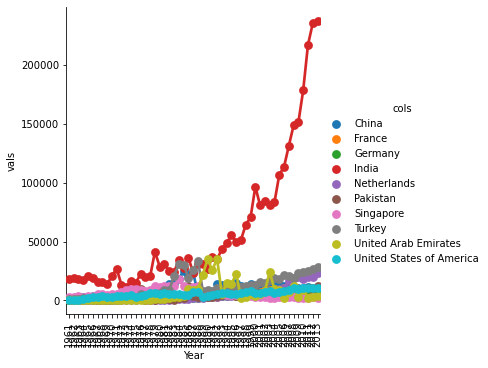

In [17]:
%matplotlib inline
plotting = data_final.melt('Year', var_name='cols',  value_name='vals')
plt.figure(figsize=(16, 6))
ax= sns.factorplot(x="Year", y="vals", hue='cols', data=plotting)
ax.set_xticklabels(rotation=90)

# Getting trends for your choice of countries and items

Select the country: India
Export trends for India


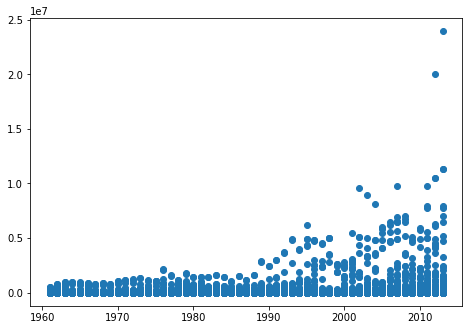

In [18]:
x=input('Select the country: ')
df_plot = df.loc[(df['Area']==x)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.Year,df_plot['Export Quantity(tonnes)'])
print('Export trends for',x)

Select the item: Spices, nes


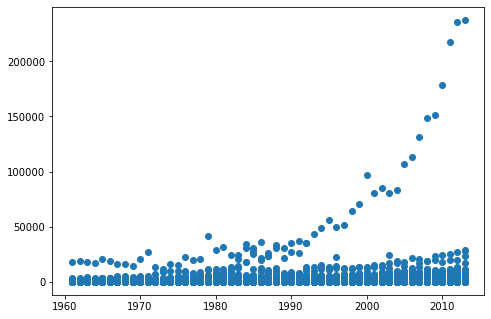

In [19]:
x=input('Select the item: ')
df_plot = df.loc[(df['Item']==x)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.Year,df_plot['Export Quantity(tonnes)'])

Select the country: India
Select the item: Spices, nes


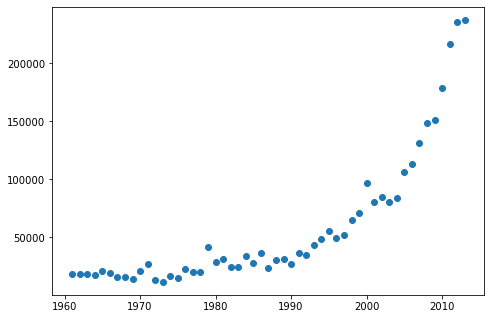

In [20]:
y=input('Select the country: ')
x=input('Select the item: ')
df_plot = df.loc[(df['Item']==x) & (df['Area']==y) ]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_plot.Year,df_plot['Export Quantity(tonnes)'])

# Linear Regression

In [21]:
r_net_t=0
r_net=0
for col in cols:
    X=data_final[['Year']]
    y=data_final[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    y_pred=lm.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    #print(r2_score(y_test, y_pred)) 
print('Average train:', r_net_t/10)    
print('Average test:', r_net/10)

Average train: 0.5179774040845071
Average test: 0.6082088919024327


In [22]:
for col in cols:
    lm = LinearRegression()
    X = data_final[['Year']]
    Y = data_final[[col]]
    lm.fit(X, Y)
    pred1 = lm.predict(pred_indx)
    #print(pred1)
    pred = pred1[0: 13]
    preds[col] = pred
preds

Area,China,France,Germany,India,Netherlands,Pakistan,Singapore,Turkey,United Arab Emirates,United States of America
2014,15261.061684,7571.313498,8779.007257,141321.117562,14036.182874,8652.505080,3934.359942,24337.016691,12312.826560,9727.070392
2015,15485.572005,7718.780035,8972.530237,144399.386067,14383.839542,8818.733430,3853.095146,24801.943235,12539.116433,9884.606193
2016,15710.082325,7866.246573,9166.053217,147477.654572,14731.496210,8984.961780,3771.830350,25266.869779,12765.406305,10042.141993
2017,15934.592646,8013.713111,9359.576197,150555.923077,15079.152879,9151.190131,3690.565554,25731.796323,12991.696178,10199.677794
2018,16159.102967,8161.179648,9553.099178,153634.191582,15426.809547,9317.418481,3609.300758,26196.722867,13217.986051,10357.213595
2019,16383.613288,8308.646186,9746.622158,156712.460087,15774.466215,9483.646831,3528.035962,26661.649411,13444.275923,10514.749395
2020,16608.123609,8456.112724,9940.145138,159790.728592,16122.122883,9649.875181,3446.771166,27126.575955,13670.565796,10672.285196


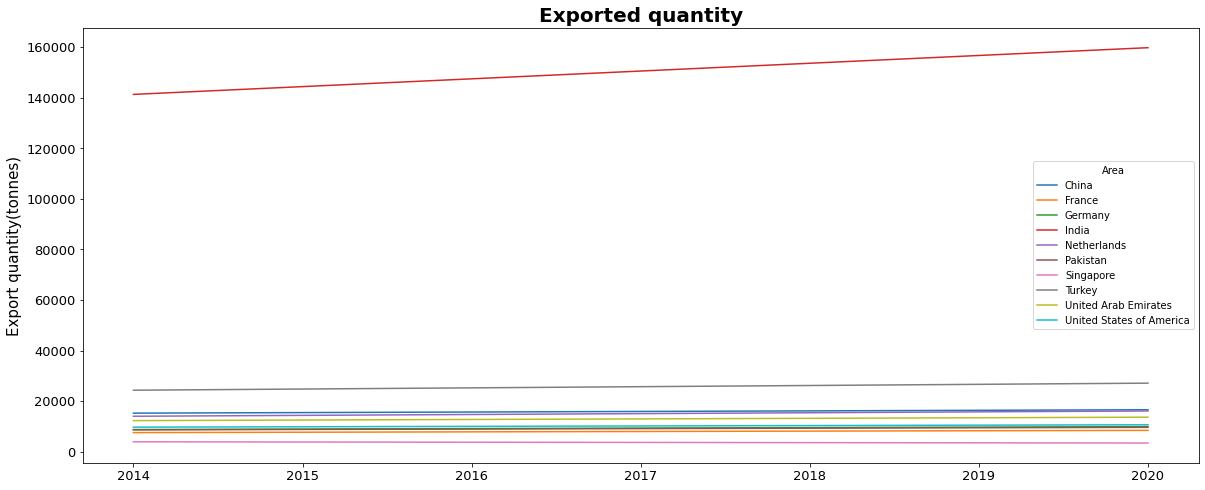

In [23]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Exported quantity', fontsize=20, fontweight='bold')
ax.set_ylabel('Export quantity(tonnes)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Polynomial Regression

Training: [0.6622198853540844, 0.7155639462774497, 0.7156646145524332, 0.7157649527412897, 0.7158649478421715, 0.7159645855887969, 0.7160638510438952, 0.7161627286283183, 0.7162612020714729, 0.7163592544672708, 0.716456868269136, 0.7165540252747656, 0.7166507066592275]
Test: [0.7612549443185204, 0.8230610902128987, 0.8233007805894369, 0.8235314515096336, 0.8237574876301931, 0.8239788676579478, 0.8241955692906464, 0.8244075702069547, 0.8246148482304942, 0.8248173812338002, 0.8250151472052416, 0.8252081242711153, 0.8253962906876839]


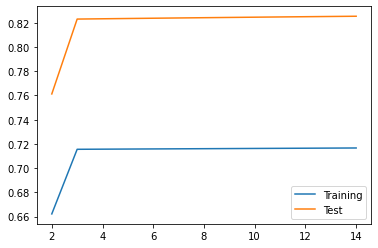

In [24]:
#Polynomial Regression
avg=[]
avg_t=[]
num=[]
for i in range(2,15):
    num.append(i)
    r_net=0
    r_net_t=0
    for col in cols:
        lm = LinearRegression()
        X=data_final[['Year']]
        y=data_final[[col]]
        poly_reg=PolynomialFeatures(degree=i)
        poly_X=poly_reg.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.30, random_state=42)
        lm.fit(X_train, y_train)
        y_pred_t=lm.predict(X_train)
        r_net_t+=r2_score(y_train, y_pred_t)
        y_pred=lm.predict(X_test)
        r_net+=r2_score(y_test, y_pred)
        #print(r2_score(y_test, y_pred))
    #print('Average:', r_net/10)
    avg.append(r_net/10)
    avg_t.append(r_net_t/10)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()

In [25]:
for col in cols:
    lm = LinearRegression()
    X = data_final[['Year']]
    poly_reg=PolynomialFeatures(degree=3)
    poly_X=poly_reg.fit_transform(X)
    Y = data_final[[col]]
    lm.fit(poly_X, Y)
    pred1 = lm.predict(poly_reg.fit_transform(pred_indx))
    pred = pred1[0: 13]
    preds[col] = pred
preds

Area,China,France,Germany,India,Netherlands,Pakistan,Singapore,Turkey,United Arab Emirates,United States of America
2014,5954.537143,4832.783083,10761.653832,248805.455208,25283.770836,11228.027792,1886.409452,26099.474716,-3257.895476,12196.001935
2015,4761.100431,4449.605473,11161.535025,268199.090126,27300.558199,11775.151208,2036.244961,27073.450015,-5687.294463,12881.565735
2016,3474.223632,4022.436835,11567.399937,288663.013039,29423.792515,12346.458764,2244.516779,28100.104754,-8314.234946,13614.006790
2017,2091.413990,3549.807229,11979.158079,310225.616722,31656.197060,12942.565538,2514.203020,29181.472775,-11144.727050,14394.972485
2018,610.178747,3030.246710,12396.718964,332915.294029,34000.495106,13564.086612,2848.281799,30319.587905,-14184.780898,15226.110212
2019,-971.974852,2462.285340,12819.992103,356760.437706,36459.409934,14211.637063,3249.731228,31516.483981,-17440.406615,16109.067361
2020,-2657.539565,1844.453175,13248.887008,381789.440544,39035.664814,14885.831974,3721.529413,32774.194834,-20917.614326,17045.491321


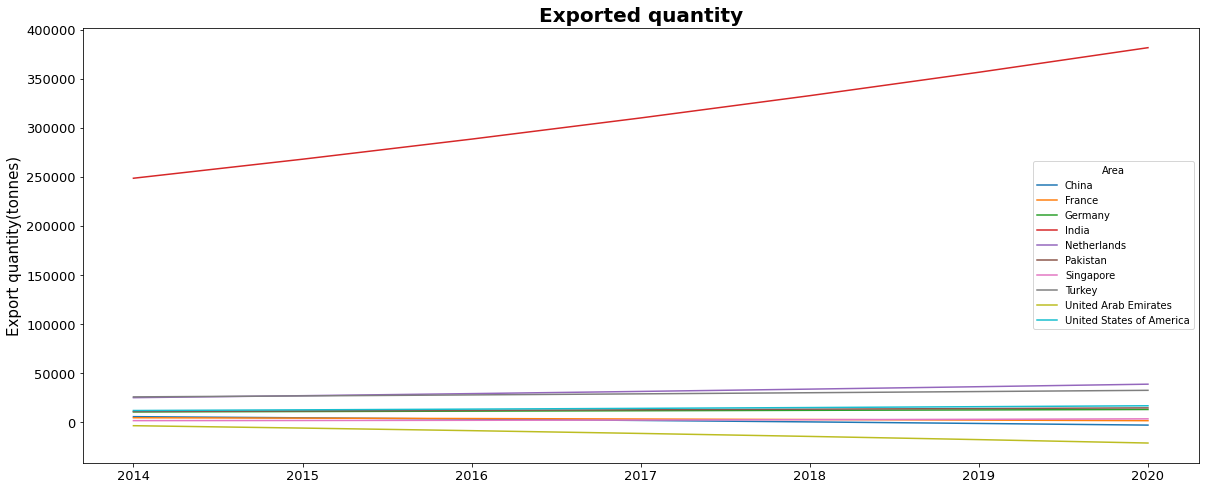

In [26]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Exported quantity', fontsize=20, fontweight='bold')
ax.set_ylabel('Export quantity(tonnes)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Ridge Regression

In [27]:
total=0
for col in cols:
    ridge = Ridge()
    parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
    ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
    X = data_final[['Year']]
    Y = data_final[[col]]
    ridge_regressor.fit(X,Y)
    print(ridge_regressor.best_params_)
    print(ridge_regressor.best_score_)

{'alpha': 20}
-37684415.66081806
{'alpha': 20}
-2335949.990360681
{'alpha': 20}
-3231103.7005023924
{'alpha': 20}
-3432100417.955991
{'alpha': 20}
-43606994.85884729
{'alpha': 20}
-5748557.054358922
{'alpha': 20}
-34604710.54192702
{'alpha': 1e-15}
-49367488.68987683
{'alpha': 20}
-99649476.48853686
{'alpha': 1e-15}
-1804198.7770189196


In [28]:
r_net=0
r_net_t=0
for col in cols:
    X=data_final[['Year']]
    y=data_final[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    y_pred_t=ridge.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    y_pred=ridge.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    #print(r2_score(y_test, y_pred))
print('Training:',r_net_t/10)
print('Test:', r_net/10)

Training: 0.5179773960198525
Test: 0.6082130603392131


In [29]:
for col in cols:
    ridge = Ridge()
    X = data_final[['Year']]
    Y = data_final[[col]]
    ridge.fit(X,Y)
    pred1 = ridge.predict(pred_indx)
    pred = pred1[0: 13]
    preds[col] = pred
    #MSEs=cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=5)
    #mean_MSE += np.mean(MSEs)
#print(mean_MSE)
preds

Area,China,France,Germany,India,Netherlands,Pakistan,Singapore,Turkey,United Arab Emirates,United States of America
2014,15260.572949,7570.992479,8778.585978,141314.416501,14035.426062,8652.143219,3934.536847,24336.004596,12312.333951,9726.727453
2015,15485.065168,7718.447127,8972.093355,144392.436819,14383.054701,8818.358167,3853.278603,24800.893655,12538.605579,9884.250553
2016,15709.557388,7865.901775,9165.600733,147470.457137,14730.683339,8984.573115,3772.020359,25265.782714,12764.877207,10041.773652
2017,15934.049608,8013.356423,9359.108110,150548.477454,15078.311977,9150.788063,3690.762115,25730.671773,12991.148835,10199.296751
2018,16158.541827,8160.811071,9552.615487,153626.497772,15425.940615,9317.003011,3609.503871,26195.560832,13217.420463,10356.819850
2019,16383.034047,8308.265719,9746.122864,156704.518090,15773.569254,9483.217959,3528.245627,26660.449891,13443.692091,10514.342950
2020,16607.526266,8455.720367,9939.630242,159782.538407,16121.197892,9649.432907,3446.987383,27125.338950,13669.963718,10671.866049


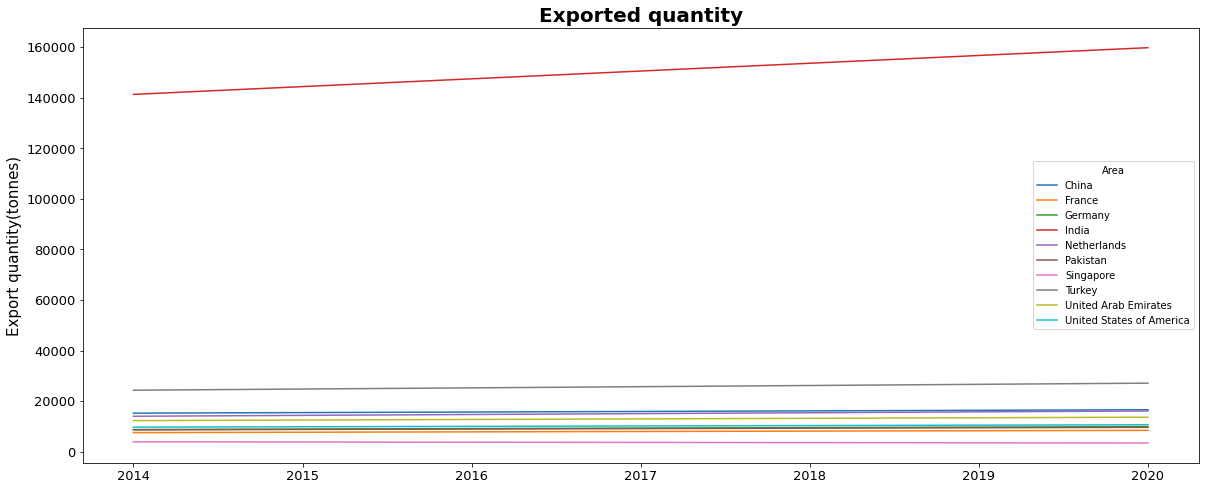

In [30]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Exported quantity', fontsize=20, fontweight='bold')
ax.set_ylabel('Export quantity(tonnes)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)

# Lasso Regression

In [31]:
for col in cols:
    lasso = Lasso()
    parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
    lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
    X = data_final[['Year']]
    Y = data_final[[col]]
    lasso_regressor.fit(X,Y)
    print(lasso_regressor.best_params_)
    print(lasso_regressor.best_score_)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 557096771.1115698, tolerance: 122467.80184761909
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551032515.6140709, tolerance: 154441.53462857148
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172195561.91926444, tolerance: 100271.81098333333
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

{'alpha': 20}
-37731027.49755515


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50378787.620706275, tolerance: 32031.387657142855
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50731679.910455726, tolerance: 37113.795333333335
  positive)


{'alpha': 20}
-2338212.4211994074


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11311779.98703248, tolerance: 37575.63345
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23079103.429140814, tolerance: 43768.55516428572
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15341438.206549894, tolerance: 49568.49884047619
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: Co

{'alpha': 10}
-3239009.758038881


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19536102709.67871, tolerance: 15383075.855250001
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28649083037.02178, tolerance: 15691982.502133336
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22648661242.1528, tolerance: 16557347.694440477
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:4

{'alpha': 1e-08}
-3438719995.6227593


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222807490.75750086, tolerance: 187985.43745714283
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326083839.56602144, tolerance: 193090.46176190473
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273632633.6274077, tolerance: 206674.4514785715
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

{'alpha': 1e-15}
-43688785.89399985


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249218.69516533613, tolerance: 59944.964188679245
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113976234.19440858, tolerance: 66042.28681190478
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240212139.85569742, tolerance: 50956.357333333326
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

{'alpha': 1e-10}
-5751310.4197157305
{'alpha': 20}
-34683877.86741451


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1030049978.310028, tolerance: 325133.37136190484
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 969780473.2474905, tolerance: 392130.7896404762
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111569869.43402492, tolerance: 306993.1892
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: Co

{'alpha': 1e-10}
-49367488.68987675
{'alpha': 20}
-99774235.97977644


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29127437.693106506, tolerance: 18878.205457142856
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25929775.997068584, tolerance: 35732.90399047619
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24023622.99347745, tolerance: 36155.64131428571
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

{'alpha': 1e-15}
-1804198.7770189208


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34819377.618910715, tolerance: 37745.019667924535
  positive)


In [32]:
r_net=0
r_net_t=0
for col in cols:
    X=data_final[['Year']]
    y=data_final[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    lasso = Lasso(alpha=1e-15)
    lasso.fit(X_train, y_train)
    y_pred=lasso.predict(X_test)
    r_net+=r2_score(y_test, y_pred)
    y_pred_t=lasso.predict(X_train)
    r_net_t+=r2_score(y_train, y_pred_t)
    #print(r2_score(y_test, y_pred))
print('Train:', r_net_t/10)
print('Test:', r_net/10)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458370299.80293226, tolerance: 120139.70104324324
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38346751.689742565, tolerance: 23308.19031891892
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17791009.470534272, tolerance: 34716.9062918919
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:

Train: 0.5179774040845067
Test: 0.6082088919024329


In [33]:
for col in cols:
    lasso = Lasso()
    X = data_final[['Year']]
    Y = data_final[[col]]
    lasso.fit(X,Y)
    pred1 = lasso.predict(pred_indx)
    pred = pred1[0: 13]
    preds[col] = pred
    #MSEs=cross_val_score(lm,X,Y,scoring='neg_mean_squared_error',cv=5)
    #mean_MSE += np.mean(MSEs)
#print(mean_MSE)
preds

Area,China,France,Germany,India,Netherlands,Pakistan,Singapore,Turkey,United Arab Emirates,United States of America
2014,15260.946299,7571.198113,8778.891872,141321.002177,14036.067489,8652.389695,3934.475327,24336.901306,12312.711176,9726.955007
2015,15485.452346,7718.660377,8972.410579,144399.266409,14383.719884,8818.613772,3853.214804,24801.823577,12538.996775,9884.486534
2016,15709.958394,7866.122642,9165.929286,147477.530640,14731.372279,8984.837849,3771.954282,25266.745847,12765.282374,10042.018062
2017,15934.464441,8013.584906,9359.447992,150555.794872,15079.024673,9151.061925,3690.693759,25731.668118,12991.567973,10199.549589
2018,16158.970489,8161.047170,9552.966699,153634.059103,15426.677068,9317.286002,3609.433237,26196.590389,13217.853572,10357.081116
2019,16383.476536,8308.509434,9746.485406,156712.323335,15774.329463,9483.510079,3528.172714,26661.512659,13444.139171,10514.612643
2020,16607.982583,8455.971698,9940.004112,159790.587567,16121.981858,9649.734156,3446.912192,27126.434930,13670.424770,10672.144170


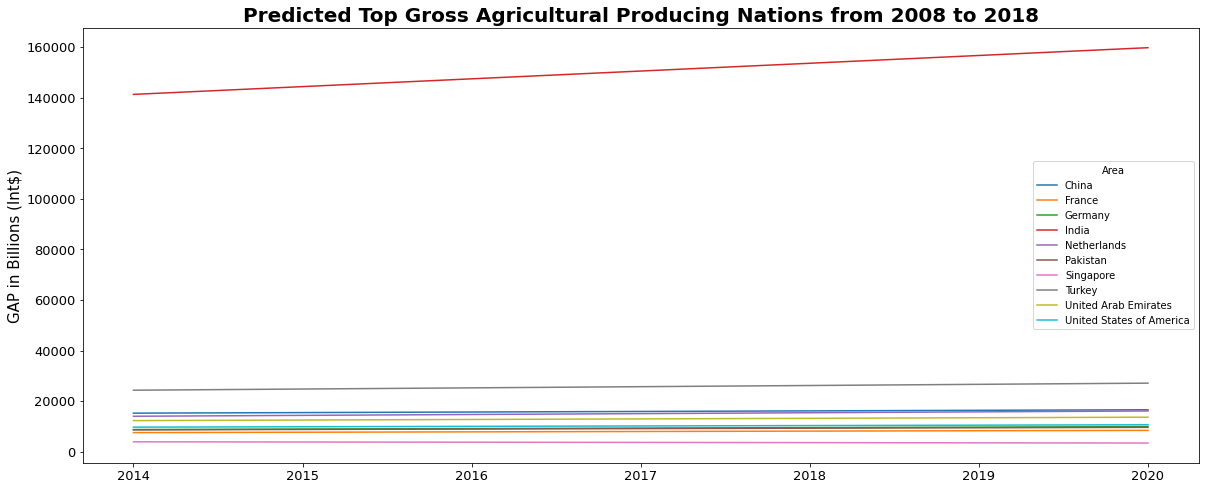

In [34]:
ax = preds.plot(kind='line', figsize=(20,8), stacked=False)
ax.set_title('Predicted Top Gross Agricultural Producing Nations from 2008 to 2018', fontsize=20, fontweight='bold')
ax.set_ylabel('GAP in Billions (Int$)', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)


# Predicting exports for per item and country

In [35]:
df = pd.read_csv('current_FAO/raw_files/Trade_Crops_Livestock_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1')
print(df.shape)
df

(14566119, 11)


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1961,1961,tonnes,0.0,NaN
1,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1962,1962,tonnes,0.0,NaN
2,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1963,1963,tonnes,0.0,NaN
3,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1964,1964,tonnes,0.0,NaN
4,2,Afghanistan,231,Almonds shelled,5910,Export Quantity,1965,1965,tonnes,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14566114,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2009,2009,1000 US$,26569.0,A
14566115,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2010,2010,1000 US$,27129.0,A
14566116,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2011,2011,1000 US$,27395.0,A
14566117,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,5922,Export Value,2012,2012,1000 US$,42666.0,A


In [36]:
df.drop(columns = ['Element Code', 'Year Code', 'Flag','Unit'], axis = 1, inplace = True)
df=df.loc[df['Element']=='Export Quantity']
df.rename(columns = {'Value':'Export Quantity(tonnes)'}, inplace = True)
df.drop(columns = ['Element'], axis = 1, inplace = True)
df

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Area Code,Area,Item Code,Item,Year,Export Quantity(tonnes)
0,2,Afghanistan,231,Almonds shelled,1961,0.0
1,2,Afghanistan,231,Almonds shelled,1962,0.0
2,2,Afghanistan,231,Almonds shelled,1963,0.0
3,2,Afghanistan,231,Almonds shelled,1964,0.0
4,2,Afghanistan,231,Almonds shelled,1965,0.0
...,...,...,...,...,...,...
14566061,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2009,17390.0
14566062,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2010,12748.0
14566063,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2011,11322.0
14566064,5817,Net Food Importing Developing Countries,1966,Wine+Vermouth+Sim.,2012,19879.0


In [37]:
drop_countries = ['USSR','European Union (exc intra-trade)', 'World', 'Saint Kitts and Nevis',
                  'Saint Lucia', 'Saint Pierre and Miquelon', 'Netherlands Antilles (former)',
                  'Saint Vincent and the Grenadines', 'Sudan (former)', 
                  'The former Yugoslav Republic of Macedonia', 'Serbia and Montenegro',
                  'Sao Tome and Principe', 'Seychelles', 'Central Asia',
                  'Belgium-Luxembourg', 'Netherlands Antilles (former)', 'EU(12)ex.int', 'EU(15)ex.int',
                  'EU(25)ex.int', 'EU(27)ex.int', 'European Union (exc intra-trade)', 'World',
                  'Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
                  'Southern Africa', 'Western Africa', 'Americas', 'Northern America',
                  'Central America', 'Caribbean', 'South America', 'Asia', 'Central Asira',
                  'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia',
                  'Europe', 'Eastern Europe', 'Northern Europe', 'Southern Europe',
                  'Western Europe', 'Oceania', 'Australia & New Zealand', 'Melanesia',
                  'Micronesia', 'Polynesia', 'European Union', 'Least Developed Countries',
                  'Land Locked Developing Countries', 'Small Island Developing States',
                  'Low Income Food Deficit Countries','Net Food Importing Developing Countries']
for x in drop_countries:
    df.drop(df[df['Area'] == x].index, axis = 0, inplace = True)
print(df.shape)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2382493, 6)


In [38]:
df_exchange = pd.read_csv('current_FAO/raw_files/Exchange_rate_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1')
print(df_exchange.shape)
df_exchange

(9515, 11)


,Area Code,Area,Item Code,Item,ISO Currency Code,Currency,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1970,1970,NaN,0.045,XAM
1,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1971,1971,NaN,0.045,XAM
2,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1972,1972,NaN,0.045,XAM
3,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1973,1973,NaN,0.045,XAM
4,2,Afghanistan,22027,Exchange rate,AFN,Afghani,1974,1974,NaN,0.045,XAM
...,...,...,...,...,...,...,...,...,...,...,...
9510,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2011,2011,NaN,1.000,XAM
9511,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2012,2012,NaN,1.000,XAM
9512,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2013,2013,NaN,1.000,XAM
9513,181,Zimbabwe,22027,Exchange rate,USD,US Dollar,2014,2014,NaN,1.000,XAM


In [39]:
df_exchange.info()
df_exchange.Unit.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Code          9515 non-null   int64  
 1   Area               9515 non-null   object 
 2   Item Code          9515 non-null   int64  
 3   Item               9515 non-null   object 
 4   ISO Currency Code  9515 non-null   object 
 5   Currency           9515 non-null   object 
 6   Year Code          9515 non-null   int64  
 7   Year               9515 non-null   int64  
 8   Unit               0 non-null      float64
 9   Value              9515 non-null   float64
 10  Flag               9515 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 817.8+ KB


array([nan])

In [40]:
df_exchange.drop(columns = ['Item Code', 'Item', 'ISO Currency Code', 'Year Code','Unit', 'Flag','Currency'], axis = 1, inplace = True)
df_exchange.rename(columns = {'Value':'Exchange rate'}, inplace = True)
df_exchange

,Area Code,Area,Year,Exchange rate
0,2,Afghanistan,1970,0.045
1,2,Afghanistan,1971,0.045
2,2,Afghanistan,1972,0.045
3,2,Afghanistan,1973,0.045
4,2,Afghanistan,1974,0.045
...,...,...,...,...
9510,181,Zimbabwe,2011,1.000
9511,181,Zimbabwe,2012,1.000
9512,181,Zimbabwe,2013,1.000
9513,181,Zimbabwe,2014,1.000


In [41]:
df = pd.merge(df, df_exchange, on = ['Area', 'Year','Area Code'])
df

,Area Code,Area,Item Code,Item,Year,Export Quantity(tonnes),Exchange rate
0,2,Afghanistan,231,Almonds shelled,1970,0.0,0.045
1,2,Afghanistan,711,"Anise, badian, fennel, coriander",1970,NaN,0.045
2,2,Afghanistan,515,Apples,1970,2317.0,0.045
3,2,Afghanistan,526,Apricots,1970,0.0,0.045
4,2,Afghanistan,527,"Apricots, dry",1970,0.0,0.045
...,...,...,...,...,...,...,...
1958354,181,Zimbabwe,1896,Tobacco,2013,154135.0,1.000
1958355,181,Zimbabwe,2077,Total Meat,2013,832.0,1.000
1958356,181,Zimbabwe,1945,"Wheat+Flour,Wheat Equivalent",2013,111.0,1.000
1958357,181,Zimbabwe,1947,"Whey, Pres+Concen",2013,0.0,1.000


In [42]:
df_gdpus = pd.read_csv('current_FAO/raw_files/Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv',encoding = 'ISO-8859-1', usecols = ['Area', 'Item', 'Element', 'Year', 'Value'])
df_gdpus.drop(df_gdpus[df_gdpus['Item'] != 'Gross Domestic Product'].index, axis = 0, inplace = True)
df_gdpus.drop(df_gdpus[df_gdpus['Element'] != 'Annual growth US$'].index, axis = 0, inplace = True)
df_gdpus.drop(columns = ['Element', 'Item'], inplace = True)
df_gdpus.columns = ['Area', 'Year', 'GDP_Growth_US$']
df_gdpus.head()

,Area,Year,GDP_Growth_US$
274,Afghanistan,1971,4.701413
275,Afghanistan,1972,-12.863980
276,Afghanistan,1973,8.635099
277,Afghanistan,1974,24.358975
278,Afghanistan,1975,9.793815


In [43]:
df = pd.merge(df, df_gdpus, on = ['Area', 'Year'])
df.head()

,Area Code,Area,Item Code,Item,Year,Export Quantity(tonnes),Exchange rate,GDP_Growth_US$
0,2,Afghanistan,231,Almonds shelled,1971,0.0,0.045,4.701413
1,2,Afghanistan,711,"Anise, badian, fennel, coriander",1971,NaN,0.045,4.701413
2,2,Afghanistan,515,Apples,1971,859.0,0.045,4.701413
3,2,Afghanistan,526,Apricots,1971,0.0,0.045,4.701413
4,2,Afghanistan,527,"Apricots, dry",1971,0.0,0.045,4.701413


In [44]:
df.info()
df.isnull().sum()
df.replace(np.nan, 0, inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1915213 entries, 0 to 1915212
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Area Code                int64  
 1   Area                     object 
 2   Item Code                int64  
 3   Item                     object 
 4   Year                     int64  
 5   Export Quantity(tonnes)  float64
 6   Exchange rate            float64
 7   GDP_Growth_US$           float64
dtypes: float64(3), int64(3), object(2)
memory usage: 131.5+ MB


Area Code                  0
Area                       0
Item Code                  0
Item                       0
Year                       0
Export Quantity(tonnes)    0
Exchange rate              0
GDP_Growth_US$             0
dtype: int64

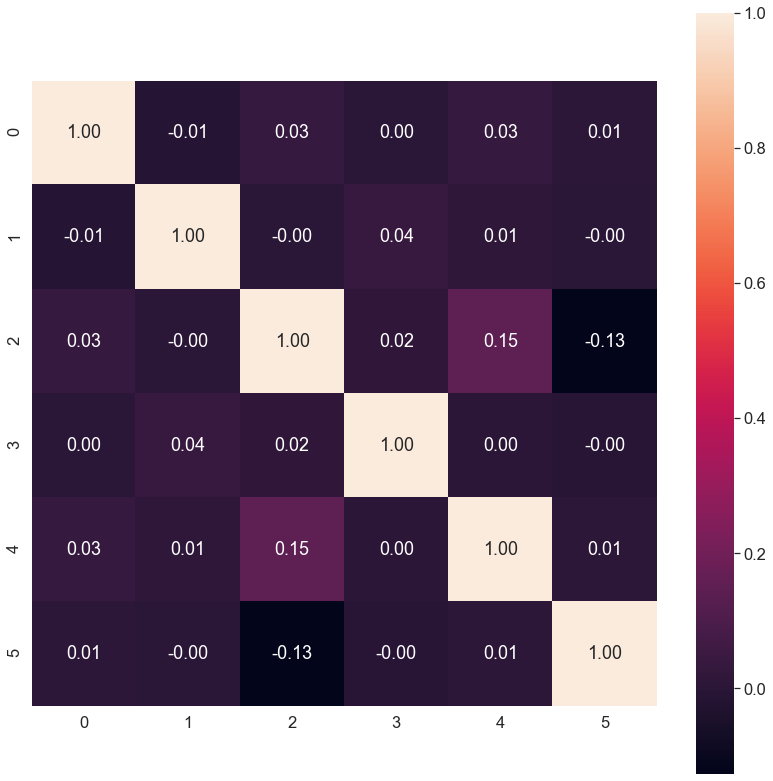

In [45]:
df_corr=df.drop(columns=['Area','Item'])
cm=np.corrcoef(df_corr.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(14,14))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f')
plt.show()

In [46]:
df

,Area Code,Area,Item Code,Item,Year,Export Quantity(tonnes),Exchange rate,GDP_Growth_US$
0,2,Afghanistan,231,Almonds shelled,1971,0.0,0.045,4.701413
1,2,Afghanistan,711,"Anise, badian, fennel, coriander",1971,0.0,0.045,4.701413
2,2,Afghanistan,515,Apples,1971,859.0,0.045,4.701413
3,2,Afghanistan,526,Apricots,1971,0.0,0.045,4.701413
4,2,Afghanistan,527,"Apricots, dry",1971,0.0,0.045,4.701413
...,...,...,...,...,...,...,...,...
1915208,181,Zimbabwe,1896,Tobacco,2013,154135.0,1.000,8.851771
1915209,181,Zimbabwe,2077,Total Meat,2013,832.0,1.000,8.851771
1915210,181,Zimbabwe,1945,"Wheat+Flour,Wheat Equivalent",2013,111.0,1.000,8.851771
1915211,181,Zimbabwe,1947,"Whey, Pres+Concen",2013,0.0,1.000,8.851771


In [47]:
df.Item.unique()

array(['Almonds shelled', 'Anise, badian, fennel, coriander', 'Apples',
       'Apricots', 'Apricots, dry', 'Cake, cottonseed', 'Cotton lint',
       'Cottonseed', 'Crude materials', 'Figs', 'Figs dried',
       'Forage products', 'Fruit, dried nes', 'Fruit, fresh nes',
       'Fruit, prepared nes', 'Grapes', 'Hair, fine',
       'Hides, cattle, wet salted', 'Honey, natural', 'Linseed', 'Maize',
       'Melons, other (inc.cantaloupes)', 'Mushrooms and truffles',
       'Nuts, nes', 'Oilseeds nes', 'Olives', 'Onions, shallots, green',
       'Oranges', 'Pears', 'Pepper (piper spp.)', 'Pistachios',
       'Plums and sloes', 'Plums dried (prunes)', 'Potatoes', 'Raisins',
       'Sesame seed', 'Silk raw', 'Skins, sheep, dry salted',
       'Spices, nes', 'Tobacco products nes', 'Tomatoes',
       'Vegetables, dehydrated', 'Vegetables, fresh nes',
       'Vegetables, fresh or dried products nes', 'Vegetables, frozen',
       'Walnuts, shelled', 'Walnuts, with shell', 'Watermelons',
       '

In [48]:
x=input("Enter the item: ")
y=input("Enter the country: ")
#df_train=df.loc[(df['Item']==x) & (df['Area'==y])]
df_train = df.loc[(df['Item'] == x) & (df['Area']==y)]
df_train.drop(columns = [ 'Item Code','Item','Area','Area Code'], inplace = True)
df_train

Enter the item: Spices, nes
Enter the country: India


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Export Quantity(tonnes),Exchange rate,GDP_Growth_US$
795305,1971,26937.0,7.4919,7.283539
795682,1972,13175.0,7.5945,8.775710
796059,1973,11561.0,7.7420,19.253193
796436,1974,16379.0,8.1016,12.865790
796813,1975,14962.0,8.3759,4.023734
797190,1976,22281.0,8.9604,0.755515
797567,1977,19993.0,8.7386,16.033815
797944,1978,20340.0,8.1928,15.679924
798321,1979,41344.0,8.1258,10.662828
798698,1980,28656.0,7.8629,22.914151


In [49]:
X=df_train.drop(columns = ['Export Quantity(tonnes)'], axis = 1)
y=df_train['Export Quantity(tonnes)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_t=lm.predict(X_train)
linear_train=r2_score(y_train, y_pred_t)
print('Training: ',linear_train)
y_pred=lm.predict(X_test)
linear_test = r2_score(y_test, y_pred)
print('Test: ',r2_score(y_test, y_pred))

Training:  0.7188939664082641
Test:  0.7479981486428982


# Polynomial Regression

Training: [0.9760959708339209, 0.9947544194658681, 0.9997968207287764, 0.9999999999999962, 0.9999999999999838]
Test: [0.9593654455828279, 0.9695899359224338, -434.1658080976928, -6856.801002996287, -6625.891464616803]


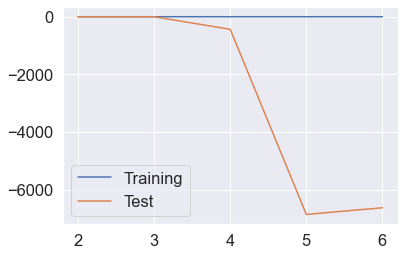

In [51]:
avg=[]
avg_t=[]
num=[]
for i in range(2,7):
    num.append(i)
    r_net=0
    r_net_t=0
    lm = LinearRegression()
    poly_reg=PolynomialFeatures(degree=i)
    poly_X=poly_reg.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,random_state=42)
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t=r2_score(y_train, y_pred_t)
    avg_t.append(r_net_t)
    y_pred=lm.predict(X_test)
    r_net=r2_score(y_test, y_pred)
    avg.append(r_net)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()
a=max(avg)
index=avg.index(a)
poly_train = avg_t[index]
poly_test = a

# Ridge Regression

In [52]:
total=0
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
x=ridge_regressor.best_params_["alpha"]

{'alpha': 20}
-4486476356.100629


In [53]:
ridge = Ridge(alpha=x)
ridge.fit(X_train, y_train)
y_pred_t=ridge.predict(X_train)
ridge_train=r2_score(y_train, y_pred_t)

print('Train: ',ridge_train)
y_pred=ridge.predict(X_test)
ridge_test=r2_score(y_test, y_pred)
print('Test: ',ridge_test)

Train:  0.9801964452744314
Test:  0.9491675563927238


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


# Lasso Regression

In [54]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
x=lasso_regressor.best_params_['alpha']

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10524598805.307695, tolerance: 12990342.885988235
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19767493319.91502, tolerance: 13836764.204850001
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15462231431.385822, tolerance: 14723187.046776472
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

{'alpha': 20}
-4755827054.568904


In [55]:
lasso = Lasso(alpha = x, max_iter = 10000000)
lasso.fit(X_train, y_train)
y_pred_t=lasso.predict(X_train)
lasso_train=r2_score(y_train, y_pred_t)
print('Train: ',lasso_train)
y_pred=lasso.predict(X_test)
lasso_test=r2_score(y_test, y_pred)
print('Test: ',lasso_test)

Train:  0.998654568321415
Test:  -30.20858960214855


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85814413.57042113, tolerance: 11991984.468670005
  positive)


# Comparing the models

In [56]:
train_error=[linear_train,poly_train,ridge_train,lasso_train]
test_error=[linear_test,poly_test,ridge_test,lasso_test]

col={'Train score(r2)':train_error,'Test score(r2)':test_error}
models=['Linear Regression','Polynomial','Ridge Regression','Lasso Regression']
df=pd.DataFrame(data=col,index=models)
df

,Train score(r2),Test score(r2)
Linear Regression,0.718894,0.747998
Polynomial,0.994754,0.969590
Ridge Regression,0.980196,0.949168
Lasso Regression,0.998655,-30.208590


(0.0, 1.0)

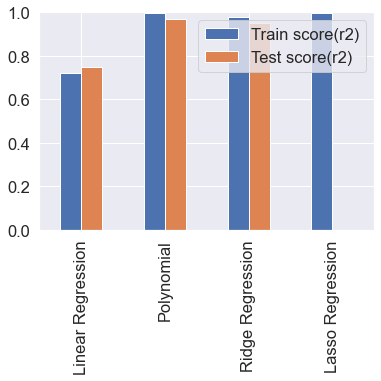

In [57]:
df.plot(kind='bar')
axes = plt.gca()
axes.set_ylim([0,1])

In [58]:
X_pred=pd.DataFrame({
    "Year":2019,
    "Exchange rate":75.75,
    "GDP_Growth_US$":4.8
}, index=[0])
X_pred
y_future=pd.DataFrame()

In [59]:
model_index = test_error.index(max(test_error))
print(model_index)

1


In [60]:
if (model_index == 0):
    lm = LinearRegression()
    lm.fit(X, y)
    y_future=lm.predict(X_pred)
    print(y_future)
elif (model_index == 1):
    lm = LinearRegression()
    poly_reg = PolynomialFeatures(degree = index + 2)
    poly_X = poly_reg.fit_transform(X)
    lm.fit(X, y)
    y_future=lm.predict(X_pred)
    print(y_future)
elif(model_index == 2):
    ridge = Ridge(alpha=x)
    ridge.fit(X, y)
    y_future=ridge.predict(X_pred)
    print(y_future)
else:
    lasso = Lasso(alpha=y)
    lasso.fit(X,y)
    y_future=lasso.predict(X_pred)
    print(y_future)

[180061.35750506]
